In [1]:
# @title Imports
import pandas_datareader.data as web
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import statistics
 
import sklearn.metrics 
from sklearn.metrics import mean_squared_error  

In [2]:
# @title Chembarambakkam
df2=pd.read_csv('chembarambakkam-storage-formatted.csv',converters={'Date': str})
df2.insert(2,'Dates', pd.to_datetime(df2['Date'], format='%Y-%m-%d'))

df2.info()

# print(df2.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    228 non-null    object        
 1   Level   228 non-null    int64         
 2   Dates   228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.5+ KB


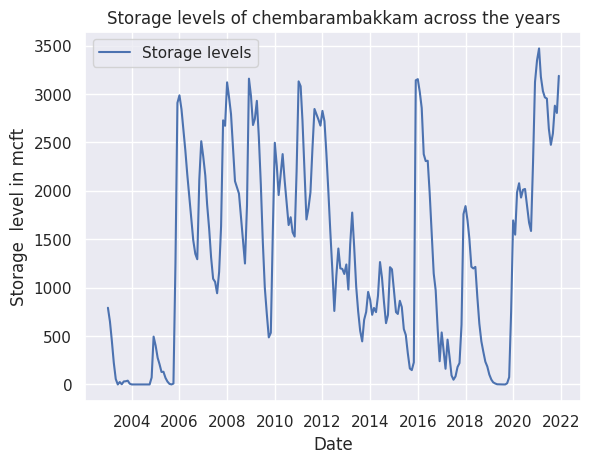

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set()
plt.ylabel('Storage  level in mcft')
plt.xlabel('Date')
plt.title('Storage levels of chembarambakkam across the years')

plt.plot(df2['Dates'],df2['Level'])
plt.legend(['Storage levels'])

In [4]:
train = df2[df2.Dates < pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
test = df2[df2.Dates >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
test
#216 -227 indicate the levels in 2021

,Date,Level,Dates
216,2021-01-01,3347,2021-01-01
217,2021-02-01,3470,2021-02-01
218,2021-03-01,3177,2021-03-01
219,2021-04-01,3030,2021-04-01
220,2021-05-01,2965,2021-05-01
221,2021-06-01,2952,2021-06-01
222,2021-07-01,2641,2021-07-01
223,2021-08-01,2475,2021-08-01
224,2021-09-01,2591,2021-09-01
225,2021-10-01,2879,2021-10-01


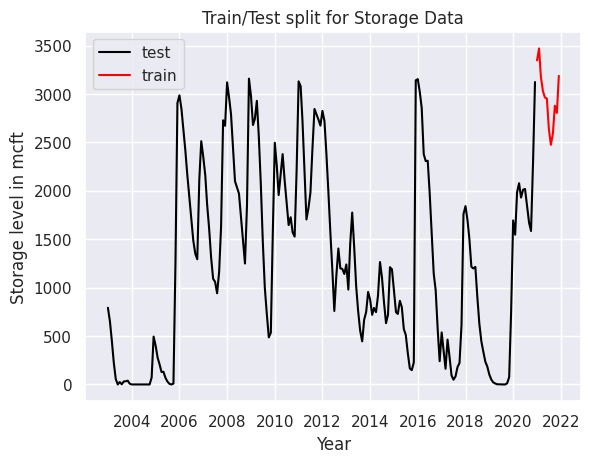

In [5]:
plt.plot(train['Dates'],train['Level'], color = "black")
plt.plot(test['Dates'],test['Level'], color = "red")
plt.xlabel('Year')
plt.ylabel('Storage level in mcft')
plt.legend(['test','train'])
plt.title("Train/Test split for Storage Data")
plt.show()


In [6]:
#@title Arima model

y = train['Level']
ARMAmodel = SARIMAX(y, order = (12, 1, 7))
# ARMAmodel = SARIMAX(y, order = (18, 1, 7))
ARMAmodel = ARMAmodel.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[]

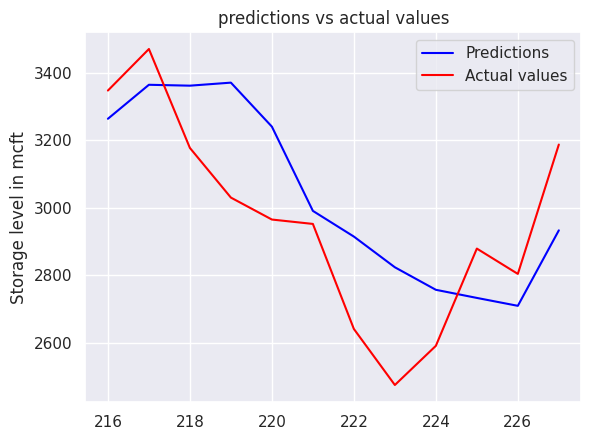

In [7]:
y_pred = ARMAmodel.get_forecast(len(test['Dates']))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_df["Predictions"]  = np.maximum(y_pred_df["Predictions"] , 0)
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue')
plt.plot(test['Level'],color='red')
plt.ylabel('Storage level in mcft')
plt.title("predictions vs actual values")
plt.legend(['Predictions','Actual values'])
plt.plot()


Text(0, 0.5, 'Storage level in mcft')

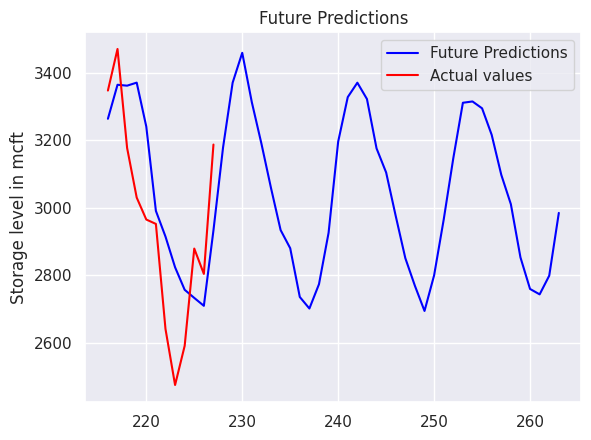

In [8]:
#future predictions

y_pred_fut = ARMAmodel.get_forecast(48)
y_pred_df_fut = y_pred_fut.conf_int(alpha = 0.05) 
y_pred_df_fut["Predictions"] = ARMAmodel.predict(start = y_pred_df_fut.index[0], end = y_pred_df_fut.index[-1])
y_pred_df_fut["Predictions"]  = np.maximum(y_pred_df_fut["Predictions"] , 0)
y_pred_out_fut = y_pred_df_fut["Predictions"] 
plt.plot(y_pred_out_fut, color='Blue')
plt.plot(test['Level'],color='red')
plt.title("Future Predictions")
plt.legend(['Future Predictions','Actual values'])
plt.ylabel('Storage level in mcft')
#values till 263 show the predicted levels from 2021-2024

In [9]:
statistics.mean(abs(y_pred_df['Predictions'] - test['Level']))
# mean absolute error

192.57276796999096

In [10]:
mse = sklearn.metrics.mean_squared_error(test['Level'], y_pred_df['Predictions'])  
rmse = math.sqrt(mse)  
rmse
#root mean square error

216.79489119067807

In [11]:
mape=np.mean(np.abs(y_pred_df['Predictions']-test['Level'])/np.abs(test['Level']))
mape
#mean absolute percentage error

0.0670351942136921

In [12]:
# @title Redhills
df=pd.read_csv('redhills-storage-formatted.csv',converters={'Date': str})
df.insert(2,'Dates', pd.to_datetime(df['Date'], format='%Y-%m-%d'))

df.info()

print(df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    228 non-null    object        
 1   Level   228 non-null    int64         
 2   Dates   228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.5+ KB
         Date  Level      Dates
0  2003-01-01   1585 2003-01-01
1  2003-02-01   1992 2003-02-01


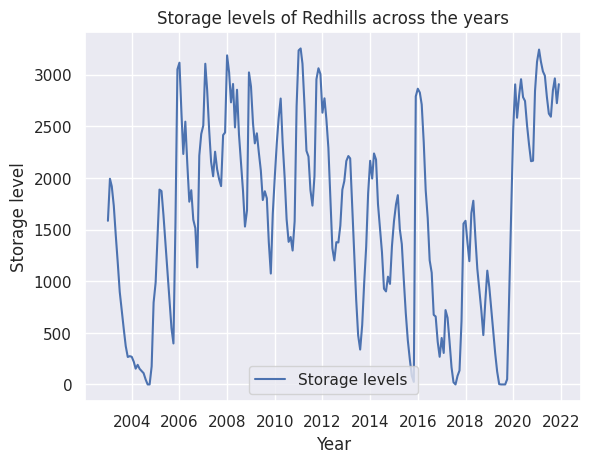

In [13]:

sns.set()
plt.ylabel('Storage level')
plt.xlabel('Year')
plt.plot(df['Dates'],df['Level'])
plt.title('Storage levels of Redhills across the years')
plt.legend(['Storage levels '])

In [14]:
train = df[df.Dates < pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
test = df[df.Dates >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
test

,Date,Level,Dates
216,2021-01-01,3125,2021-01-01
217,2021-02-01,3243,2021-02-01
218,2021-03-01,3128,2021-03-01
219,2021-04-01,3032,2021-04-01
220,2021-05-01,2990,2021-05-01
221,2021-06-01,2784,2021-06-01
222,2021-07-01,2623,2021-07-01
223,2021-08-01,2593,2021-08-01
224,2021-09-01,2847,2021-09-01
225,2021-10-01,2964,2021-10-01


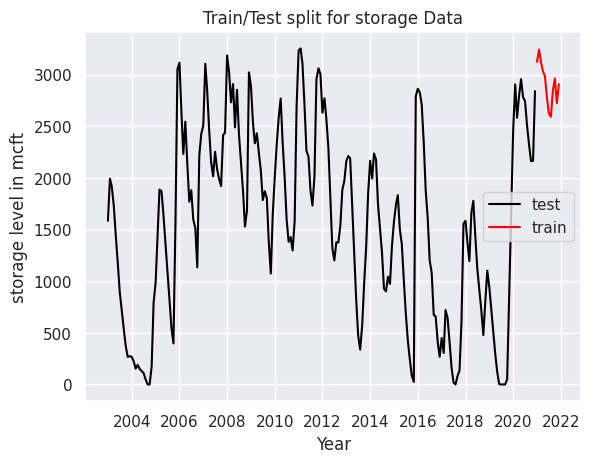

In [15]:
plt.plot(train['Dates'],train['Level'], color = "black")
plt.plot(test['Dates'],test['Level'], color = "red")
plt.xlabel('Year')
plt.ylabel('storage level in mcft')

plt.title("Train/Test split for storage Data")
plt.legend(['test','train'])
plt.show()


In [16]:
#@title Arima model

y = train['Level']
# ARMAmodel = SARIMAX(y, order = (12, 1, 7))
ARMAmodel = SARIMAX(y, order = (14, 2, 6))
ARMAmodel = ARMAmodel.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[]

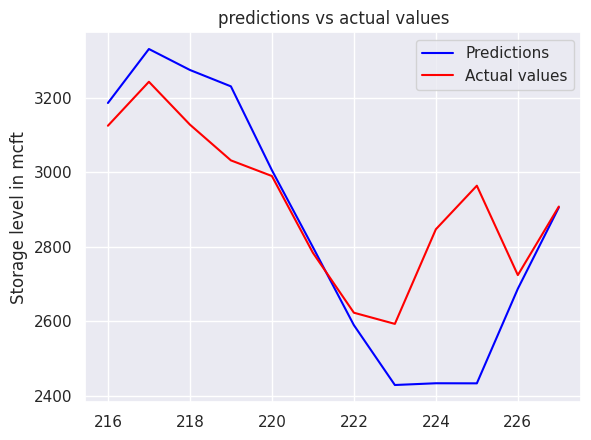

In [17]:
y_pred = ARMAmodel.get_forecast(len(test['Dates']))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_df["Predictions"]  = np.maximum(y_pred_df["Predictions"] , 0)
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue')
plt.plot(test['Level'],color='red')
plt.title("predictions vs actual values")
plt.ylabel('Storage level in mcft')

plt.legend(['Predictions','Actual values'])
plt.plot()

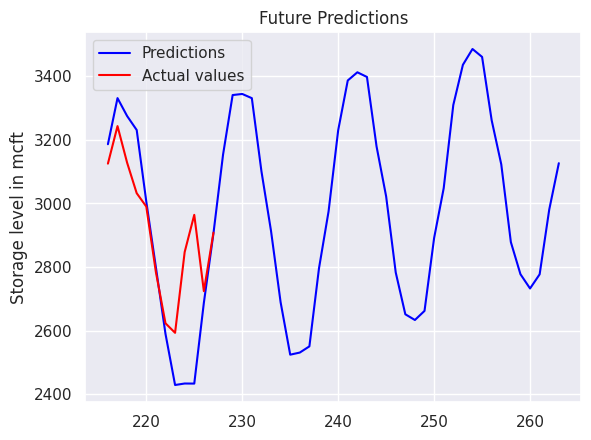

In [18]:
#future predictions

y_pred_fut = ARMAmodel.get_forecast(48)
y_pred_df_fut = y_pred_fut.conf_int(alpha = 0.05) 
y_pred_df_fut["Predictions"] = ARMAmodel.predict(start = y_pred_df_fut.index[0], end = y_pred_df_fut.index[-1])
y_pred_df_fut["Predictions"]  = np.maximum(y_pred_df_fut["Predictions"] , 0)
y_pred_out_fut = y_pred_df_fut["Predictions"] 
plt.plot(y_pred_out_fut, color='Blue')
plt.plot(test['Level'],color='red')
plt.title("Future Predictions")
plt.ylabel('Storage level in mcft')

plt.legend(['Predictions','Actual values'])
#values till 263 show the predicted levels from 2021-2024

In [19]:
statistics.mean(abs(y_pred_df['Predictions'] - test['Level']))
# mean absolute error

142.14266668205187

In [20]:
mse = sklearn.metrics.mean_squared_error(test['Level'], y_pred_df['Predictions'])  
rmse = math.sqrt(mse)  
rmse
#root mean square error

215.02097441825535

In [21]:
mape=np.mean(np.abs(y_pred_df['Predictions']-test['Level'])/np.abs(test['Level']))
mape
#mean absolute percentage error

0.04868870630998503